
# Author: Munshi Khan
### Data Science and Business Analytics Intern at The Spark Foundation

# The Spark Foundation GRIP Task-1 

# **Prediction using Supervised ML**
### Prediction of a student's percentage score based upon the Hours of study. This is a simple linear regression with two variables.



## Importing relevant libraries

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

## Importing dataset from url

In [4]:
#Reading data from an external url
sample_data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

sample_data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Descriptive analysis of dataset 

In [5]:
#analyzing some descriptive statistics of the dataset
sample_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#checking for missing or null values.
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


***as we see the dataset has no missing values***

## Visualizing the data

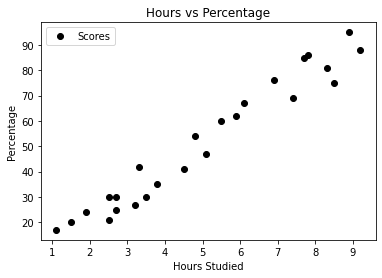

In [7]:
# Plotting the distribution of scores
sample_data.plot(x='Hours', y='Scores', style='o', color = "black")  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage')  
plt.show()

**from the above scatter plot, we can infer that there is a positive linear relationship between the number of hours studied and percentage of score.**

## **Preparing the data**

**The next step is to specify dependent and independent variables in our model.**

In [8]:
#specifying dependent(y) & independent variables(x).
x = sample_data["Hours"]
y = sample_data["Scores"]

**Our next task is to split this dataset into training and test datasets. We'll do this by using Scikit-Learn's built-in train_test_split() method:**

In [9]:
#splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=48) 

## **Fitting the model**
**After splitting the data into training and testing datasets, now we fit a linear regression model to our dataset.**

In [10]:
x = sm.add_constant(x_train)
regression_model = sm.OLS(y_train,x).fit()

In [11]:
#summary of regression analysis
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     443.0
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           3.98e-14
Time:                        22:45:02   Log-Likelihood:                -60.425
No. Observations:                  20   AIC:                             124.8
Df Residuals:                      18   BIC:                             126.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3718      2.603      0.527      0.605      -4.096       6.840
Hours         10.0160      0.476     21.048      0.000       9.016      11.016
==============================================================================
Omnibus:                       13.853   Durbin-Watson:                   2.247
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                2.303
Skew:                          -0.065   Prob(JB):                        0.316
Kurtosis:                       1.343   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Analysing the R-square value we find that out model explains approximately 96% of the variation in scores.**


## Plotting the regression line 

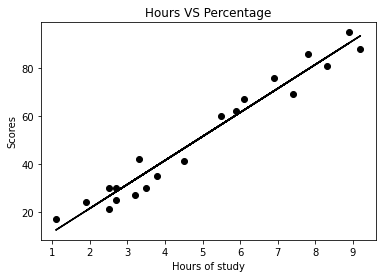

In [12]:
# Plotting the regression line
regression_line = x_train*10.0160+1.3718

# Plotting for the test data
plt.scatter(x_train, y_train, color="black")
plt.plot(x_train, regression_line, color = "black" )
plt.title('Hours VS Percentage')
plt.xlabel("Hours of study")
plt.ylabel("Scores")
plt.show()

**from the above graph, we can see that our model fits the data very well.**

## **Testing the model**
**Now that we have fitted our model, it is time to test the model using test dataset.**

In [13]:
df = pd.DataFrame({'Constant': 1,'Hours of study': x_test})
y_pred = regression_model.predict(df)
Predictions = pd.DataFrame({"Actual Score": y_test, "Predicted Score": y_pred})
print("Predictions")
Predictions = Predictions.reset_index(drop=True)
Predictions

Predictions


,Actual Score,Predicted Score
0,75,86.507846
1,85,78.495044
2,54,49.448640
3,47,52.453440
4,20,16.395835


## Prediction

In [14]:
#Prediction the score of a student who studies 9.25hrs/day
hours = 9.25
pred= regression_model.predict([1, hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 94.01984693054813


**The predicted score of a student who studies 9.25 hours daily is approximately 94.**

## **Evaluating the model**

**The final step is to evaluate the performance of our model. For simplicity here, we have chosen the mean square error. There are many such metrics.**

In [15]:
from sklearn import metrics
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 

Mean Squared Error: 47.63797174098515
